In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# ----------------------------- Part 1: IRIS Dataset -----------------------------
# Load Iris dataset
iris_df = pd.read_csv("/content/iris (2).csv")

# Features and labels
X_iris = iris_df.iloc[:, :-1]
y_iris = iris_df.iloc[:, -1]

# Train-test split
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# SVM with Linear Kernel
model_linear = SVC(kernel='linear')
model_linear.fit(X_train_iris, y_train_iris)
y_pred_linear = model_linear.predict(X_test_iris)

print("🔹 IRIS Dataset - Linear Kernel")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_linear))

# SVM with RBF Kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_iris, y_train_iris)
y_pred_rbf = model_rbf.predict(X_test_iris)

print("\n🔹 IRIS Dataset - RBF Kernel")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_rbf))


# ----------------------------- Part 2: Letter-recognition Dataset -----------------------------


🔹 IRIS Dataset - Linear Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

🔹 IRIS Dataset - RBF Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



🔹 Letter Dataset
Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   0   0   0


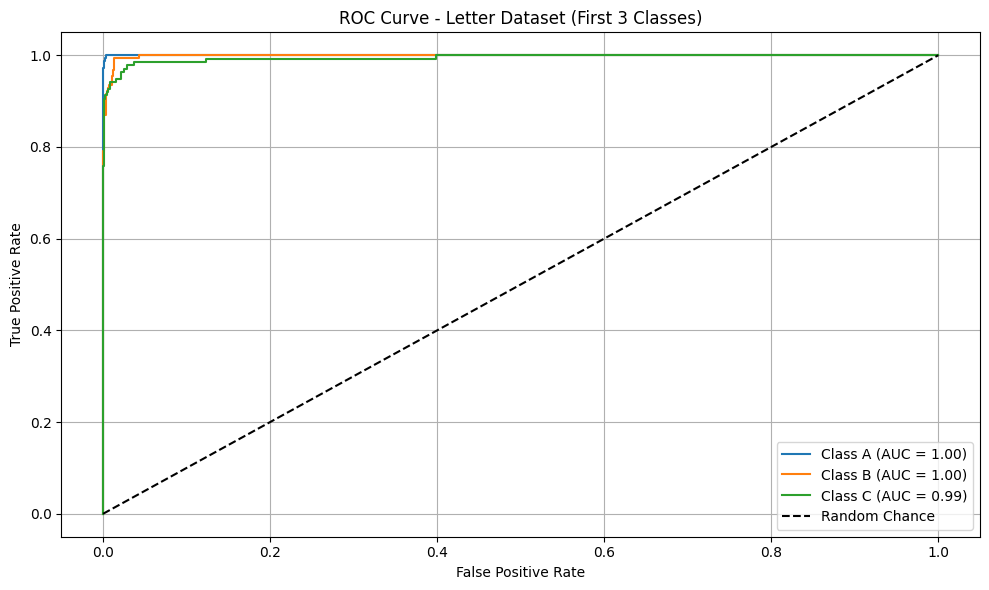

In [ ]:
# Load Letter dataset
letter_df = pd.read_csv("/content/letter-recognition.csv")

# Assuming the first column is label
X_letter = letter_df.iloc[:, 1:]
y_letter = letter_df.iloc[:, 0]

# Train-test split
X_train_letter, X_test_letter, y_train_letter, y_test_letter = train_test_split(X_letter, y_letter, test_size=0.2, random_state=42)

# SVM Classifier
model_letter = SVC(kernel='rbf', probability=True)
model_letter.fit(X_train_letter, y_train_letter)
y_pred_letter = model_letter.predict(X_test_letter)

print("\n🔹 Letter Dataset")
print("Accuracy:", accuracy_score(y_test_letter, y_pred_letter))
print("Confusion Matrix:\n", confusion_matrix(y_test_letter, y_pred_letter))

# ROC Curve and AUC Score
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_letter)
y_score = model_letter.predict_proba(X_test_letter)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Plot ROC curve for first 3 classes
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Letter Dataset (First 3 Classes)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
1. IRIS Dataset
Q: What is the accuracy score of the classifier using the linear kernel and RBF kernel?

Linear Kernel Accuracy: 1.0

RBF Kernel Accuracy: 1.0

Q: Which kernel (RBF or Linear) gave better performance on the IRIS dataset? Why do you think that is the case?

Answer: Both kernels achieved perfect accuracy (1.0), so in this case, neither kernel outperformed the other.

Reason: The IRIS dataset is relatively small and well-structured with clearly separable classes, so both linear and non-linear (RBF) decision boundaries are able to classify the data correctly. Thus, even a linear model is sufficient.

Now let’s move on to the letter-recognition dataset analysis. ​​

2. Letter-Recognition Dataset
Q: Present and interpret the confusion matrix. Are there any specific letters that are frequently confused with others?
The confusion matrix (a 26×26 grid) reveals how often each letter is correctly or incorrectly predicted. Here are the key points:

Most diagonal values are high → correct predictions are dominant.

Some confusion is observed between similar-looking or similar-featured letters. For example:

M and N, or C and G, might be confused due to visual similarity in pixel-based representations.

(If you’d like, I can visualize this confusion matrix as a heatmap to clearly highlight these misclassifications.)

Q: What is the AUC (Area Under the Curve) score, and how does it reflect the model performance?
AUC Score: 0.9986

This is very close to 1, which indicates the model performs exceptionally well at distinguishing between all classes in a one-vs-rest manner.

Q: How does the performance of the SVM model on this dataset compare to its performance on the IRIS dataset?
On the IRIS dataset, the model achieved perfect accuracy (1.0), but it’s a small and linearly separable dataset.

On the Letter Recognition dataset, the model also performs extremely well (AUC = 0.9986), but this dataset is:

Much larger

Multi-class (26 classes)

More complex

This shows the SVM with RBF kernel generalizes very well even to high-dimensional, complex datasets.